In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/delhi-weather-data/testset.csv


In [2]:
df = pd.read_csv("/kaggle/input/delhi-weather-data/testset.csv")

In [3]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


# Problem Set

# EDA & Data Munging

In [4]:
df.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [5]:
df.columns = map(lambda x: x.strip(), df.columns)

In [6]:
df.columns # Space removed

Index(['datetime_utc', '_conds', '_dewptm', '_fog', '_hail', '_heatindexm',
       '_hum', '_precipm', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wdire', '_wgustm',
       '_windchillm', '_wspdm'],
      dtype='object')

In [7]:
df._conds.value_counts(ascending=False)

Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Fog                           64
Light Thunderstorm                  64
Heavy Rain               

In [8]:
df._wdire.value_counts()

North       19034
West        11888
WNW          7464
East         7233
NW           7117
WSW          5466
ESE          5336
ENE          3721
SE           3513
SW           3200
NNW          2696
NE           2500
SSE          2052
NNE          1752
SSW          1715
South        1543
Variable        5
Name: _wdire, dtype: int64

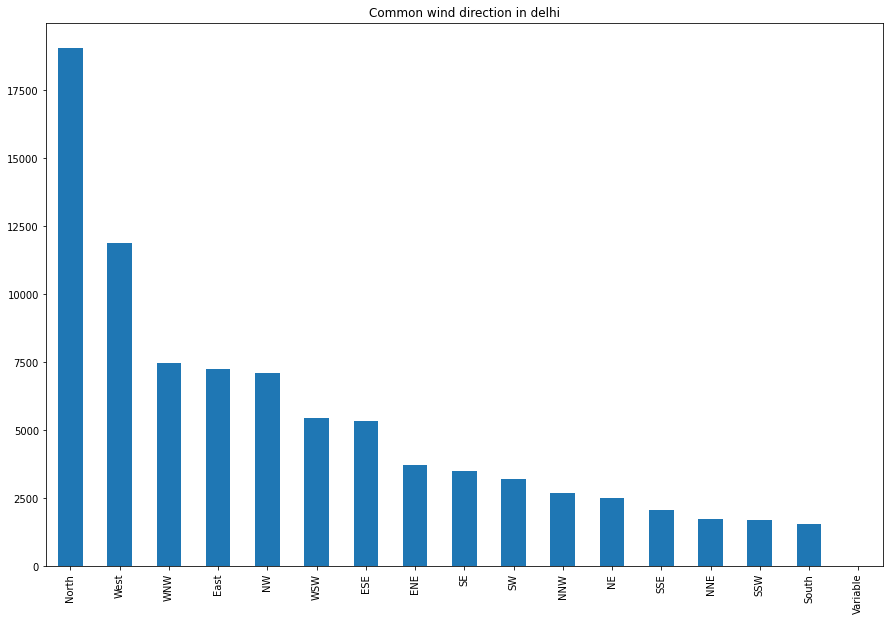

In [9]:
plt.figure(figsize=(15, 10));
plt.title("Common wind direction in delhi");
df._wdire.value_counts().plot(kind="bar");
plt.plot();

In [10]:
# Average temprature
print("average temprature in delhi:", round(df._tempm.mean(axis=0),2))

average temprature in delhi: 25.45


In [11]:
def extract_year(value):
    return (value[0:4])

In [12]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [13]:
def extract_month(value):
    return (value[4:6])

In [14]:
df["year"] = df["datetime_utc"].apply(lambda x:extract_year(x))
df["month"] = df["datetime_utc"].apply(lambda x:extract_month(x))

In [15]:
df.head() 

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,...,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm,year,month
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,...,0,0,5.0,280.0,West,NaN,NaN,7.4,1996,11
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,...,0,0,NaN,0.0,North,NaN,NaN,NaN,1996,11
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,...,0,0,NaN,0.0,North,NaN,NaN,NaN,1996,11
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,...,0,0,2.0,0.0,North,NaN,NaN,NaN,1996,11
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,...,0,0,1.2,0.0,North,NaN,NaN,0.0,1996,11


In [16]:
print("max, min: ", df.year.max(), ",", df.year.min())

max, min:  2017 , 1996


In [17]:
# So our given data is from 1996 to 2017. 

In [18]:
# Number of records for paticular year
df.year.value_counts()

2003    13186
2004     9151
2002     8503
2001     8403
2016     6634
1997     6513
1999     6300
2000     5391
1998     3579
2014     2973
2015     2936
2005     2920
2007     2865
2006     2858
2008     2857
2009     2851
2010     2768
2011     2738
2012     2438
2013     2428
2017     1420
1996     1278
Name: year, dtype: int64

In [19]:
df.groupby("year")._tempm.mean()

year
1996    16.518636
1997    24.444635
1998    24.847371
1999    27.335731
2000    23.865647
2001    25.582460
2002    26.481948
2003    26.176556
2004    26.004396
2005    24.712715
2006    25.449245
2007    24.800211
2008    24.525744
2009    25.355360
2010    25.553338
2011    24.966362
2012    25.024661
2013    24.679222
2014    25.175735
2015    25.141832
2016    27.315734
2017    20.204369
Name: _tempm, dtype: float64

In [20]:
df_mean = df.groupby("year")._tempm.mean().reset_index().sort_values('_tempm', ascending=True)

In [21]:
df_mean.dtypes

year       object
_tempm    float64
dtype: object

In [22]:
df_mean.year = df_mean.year.astype("float")

In [23]:
df_mean.dtypes

year      float64
_tempm    float64
dtype: object

So u can see there was a big change in year 1996-1997. It may be because of many reasons:
1. New industries started in the city.
2. People started purchasing more vehicles.
or any other reasons.

# Missing Values

In [24]:
df.isnull().sum()

datetime_utc         0
_conds              72
_dewptm            621
_fog                 0
_hail                0
_heatindexm      71835
_hum               757
_precipm        100990
_pressurem         232
_rain                0
_snow                0
_tempm             673
_thunder             0
_tornado             0
_vism             4428
_wdird           14755
_wdire           14755
_wgustm          99918
_windchillm     100411
_wspdm            2358
year                 0
month                0
dtype: int64

We will make copy of original dataset and will take only relevant columns.

In [25]:
df.columns

Index(['datetime_utc', '_conds', '_dewptm', '_fog', '_hail', '_heatindexm',
       '_hum', '_precipm', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wdire', '_wgustm',
       '_windchillm', '_wspdm', 'year', 'month'],
      dtype='object')

In [26]:
df_filtered = df[['datetime_utc', '_conds', '_dewptm', '_fog', '_hail',
       '_hum', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wdire'
       , '_wspdm', 'year', "month"]]

In [27]:
# Lets replace missing values in _dewptm. We can take an avrgae of that year
df_filtered[df_filtered._dewptm.isnull()]

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month
124,19961108-01:00,Smoke,NaN,0,0,NaN,1014.0,0,0,NaN,0,0,2.0,0.0,North,0.0,1996,11
240,19961113-02:00,Smoke,NaN,0,0,NaN,1012.0,0,0,NaN,0,0,NaN,280.0,West,5.6,1996,11
303,19961116-06:00,Unknown,NaN,0,0,NaN,-9999.0,0,0,NaN,0,0,NaN,0.0,North,NaN,1996,11
520,19961126-04:00,Smoke,NaN,0,0,NaN,1017.0,0,0,NaN,0,0,1.6,0.0,North,0.0,1996,11
584,19961129-18:00,Smoke,NaN,0,0,NaN,-9999.0,0,0,NaN,0,0,0.7,0.0,North,0.0,1996,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96965,20160907-08:30,Haze,NaN,0,0,NaN,1005.0,0,0,NaN,0,0,4.5,320.0,NW,9.3,2016,09
97259,20160924-12:30,Haze,NaN,0,0,NaN,1002.0,0,0,NaN,0,0,3.0,0.0,North,0.0,2016,09
98049,20161025-07:30,Widespread Dust,NaN,0,0,NaN,1009.0,0,0,NaN,0,0,3.5,280.0,West,14.8,2016,10
99347,20161221-05:30,Haze,NaN,0,0,NaN,1018.0,0,0,NaN,0,0,3.0,270.0,West,11.1,2016,12


In [28]:
for index,row in df_filtered[df_filtered._dewptm.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._dewptm.mean()
    df_filtered.at[index, "_dewptm"] = mean_val
    

In [29]:
df_filtered[df_filtered._dewptm.isnull()] # We replaced null values fof _dewtmp

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month


In [30]:
df_filtered.shape

(100990, 18)

In [31]:
df_filtered.isnull().sum()

datetime_utc        0
_conds             72
_dewptm             0
_fog                0
_hail               0
_hum              757
_pressurem        232
_rain               0
_snow               0
_tempm            673
_thunder            0
_tornado            0
_vism            4428
_wdird          14755
_wdire          14755
_wspdm           2358
year                0
month               0
dtype: int64

In [32]:
# Handle _hum column.
df_filtered[df_filtered._hum.isnull()]

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month
124,19961108-01:00,Smoke,5.992851,0,0,NaN,1014.0,0,0,NaN,0,0,2.00,0.0,North,0.0,1996,11
240,19961113-02:00,Smoke,5.992851,0,0,NaN,1012.0,0,0,NaN,0,0,NaN,280.0,West,5.6,1996,11
303,19961116-06:00,Unknown,5.992851,0,0,NaN,-9999.0,0,0,NaN,0,0,NaN,0.0,North,NaN,1996,11
520,19961126-04:00,Smoke,5.992851,0,0,NaN,1017.0,0,0,NaN,0,0,1.60,0.0,North,0.0,1996,11
584,19961129-18:00,Smoke,5.992851,0,0,NaN,-9999.0,0,0,NaN,0,0,0.70,0.0,North,0.0,1996,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98641,20161117-07:30,Unknown,10.000000,0,0,NaN,1017.0,0,0,NaN,0,0,NaN,0.0,North,NaN,2016,11
99268,20161217-09:00,Smoke,11.000000,0,0,NaN,1016.0,0,0,NaN,0,0,1.00,20.0,NNE,25.9,2016,12
99347,20161221-05:30,Haze,18.274320,0,0,NaN,1018.0,0,0,NaN,0,0,3.00,270.0,West,11.1,2016,12
99567,20161231-15:00,NaN,13.000000,0,0,NaN,1016.0,0,0,NaN,0,0,0.05,10.0,North,59.3,2016,12


In [33]:
for index,row in df_filtered[df_filtered._hum.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._hum.mean()
    df_filtered.at[index, "_hum"] = mean_val
    

In [34]:
df_filtered[df_filtered._hum.isnull()] # replaced

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month


In [35]:
df_filtered.isnull().sum() # Now lets handle _pressurem

datetime_utc        0
_conds             72
_dewptm             0
_fog                0
_hail               0
_hum                0
_pressurem        232
_rain               0
_snow               0
_tempm            673
_thunder            0
_tornado            0
_vism            4428
_wdird          14755
_wdire          14755
_wspdm           2358
year                0
month               0
dtype: int64

In [36]:
df_filtered[df_filtered._pressurem.isnull()]

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month
60703,20040625-21:00,Haze,21.0,0,0,62.0,NaN,0,0,26.0,0,0,2.0,NaN,NaN,0.0,2004,06
60723,20040628-09:00,Haze,20.0,0,0,27.0,NaN,0,0,37.0,0,0,4.0,0.0,North,3.7,2004,06
60728,20040629-00:00,Haze,21.0,0,0,63.0,NaN,0,0,27.0,0,0,2.0,NaN,NaN,0.0,2004,06
60921,20040723-09:00,Haze,24.0,0,0,37.0,NaN,0,0,37.0,0,0,2.0,NaN,NaN,0.0,2004,07
61255,20040829-18:00,Haze,27.0,0,0,75.0,NaN,0,0,31.0,0,0,2.0,NaN,NaN,0.0,2004,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96567,20160821-00:00,Mist,25.0,0,0,81.0,NaN,0,0,28.0,0,0,2.0,110.0,ESE,9.3,2016,08
96907,20160902-18:00,Mist,25.0,0,0,79.0,NaN,0,0,28.0,0,0,2.0,270.0,West,7.4,2016,09
98402,20161108-06:00,Smoke,14.0,0,0,39.0,NaN,0,0,25.0,0,0,1.0,270.0,West,22.2,2016,11
98820,20161126-09:00,Haze,8.0,0,0,15.0,NaN,0,0,30.0,0,0,4.0,290.0,WNW,14.8,2016,11


In [37]:
df_filtered.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month
0,19961101-11:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4,1996,11
1,19961101-12:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,1996,11
2,19961101-13:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,1996,11
3,19961101-14:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,1996,11
4,19961101-16:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0,1996,11


In [38]:
df_filtered._pressurem.replace(-9999.0, np.nan, inplace=True)


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [39]:
df_filtered.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month
0,19961101-11:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4,1996,11
1,19961101-12:00,Smoke,10.0,0,0,32.0,NaN,0,0,28.0,0,0,NaN,0.0,North,NaN,1996,11
2,19961101-13:00,Smoke,11.0,0,0,44.0,NaN,0,0,24.0,0,0,NaN,0.0,North,NaN,1996,11
3,19961101-14:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,1996,11
4,19961101-16:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0,1996,11


In [40]:
df_filtered._pressurem.isnull().sum()

983

In [41]:

for index,row in df_filtered[df_filtered._pressurem.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._pressurem.mean()
    df_filtered.at[index, "_pressurem"] = mean_val
    

In [42]:
df_filtered.isnull().sum() 

datetime_utc        0
_conds             72
_dewptm             0
_fog                0
_hail               0
_hum                0
_pressurem          0
_rain               0
_snow               0
_tempm            673
_thunder            0
_tornado            0
_vism            4428
_wdird          14755
_wdire          14755
_wspdm           2358
year                0
month               0
dtype: int64

In [43]:
for index,row in df_filtered[df_filtered._tempm.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._tempm.mean()
    df_filtered.at[index, "_tempm"] = mean_val
    

In [44]:
for index,row in df_filtered[df_filtered._vism.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._vism.mean()
    df_filtered.at[index, "_vism"] = mean_val

In [45]:
for index,row in df_filtered[df_filtered._wdird.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._wdird.mean()
    df_filtered.at[index, "_wdird"] = mean_val

In [46]:
for index,row in df_filtered[df_filtered._wspdm.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._wspdm.mean()
    df_filtered.at[index, "_wspdm"] = mean_val

In [47]:
df_filtered.isnull().sum()

datetime_utc        0
_conds             72
_dewptm             0
_fog                0
_hail               0
_hum                0
_pressurem          0
_rain               0
_snow               0
_tempm              0
_thunder            0
_tornado            0
_vism               0
_wdird              0
_wdire          14755
_wspdm              0
year                0
month               0
dtype: int64

In [48]:
for index,row in df_filtered[df_filtered._wdire.isnull()].iterrows():
    most_frequent = df_filtered[df_filtered["year"] == row["year"]]._wdire.value_counts().idxmax()
    df_filtered.at[index, "_wdire"] = most_frequent

In [49]:
df_filtered.isnull().sum()

datetime_utc     0
_conds          72
_dewptm          0
_fog             0
_hail            0
_hum             0
_pressurem       0
_rain            0
_snow            0
_tempm           0
_thunder         0
_tornado         0
_vism            0
_wdird           0
_wdire           0
_wspdm           0
year             0
month            0
dtype: int64

In [50]:
# now we can see,  _conds which is again acategorical feature.
# so we will apply again the same strategy as above(_wdire)
for index,row in df_filtered[df_filtered._conds.isnull()].iterrows():
    most_frequent = df_filtered[df_filtered["year"] == row["year"]]._conds.value_counts().idxmax()
    df_filtered.at[index, "_conds"] = most_frequent

In [51]:
df_filtered.isnull().sum()


datetime_utc    0
_conds          0
_dewptm         0
_fog            0
_hail           0
_hum            0
_pressurem      0
_rain           0
_snow           0
_tempm          0
_thunder        0
_tornado        0
_vism           0
_wdird          0
_wdire          0
_wspdm          0
year            0
month           0
dtype: int64

In [52]:
df_filtered.year = df_filtered.year.astype("object")
df_filtered.month = df_filtered.month.astype("object")

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [53]:
df_filtered.dtypes

datetime_utc     object
_conds           object
_dewptm         float64
_fog              int64
_hail             int64
_hum            float64
_pressurem      float64
_rain             int64
_snow             int64
_tempm          float64
_thunder          int64
_tornado          int64
_vism           float64
_wdird          float64
_wdire           object
_wspdm          float64
year             object
month            object
dtype: object

In [54]:
pd.crosstab(df_filtered.year, [df_filtered.month], values=df_filtered._tempm, aggfunc="mean")

month,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.415046,13.865403
1997,13.048083,15.825284,21.173384,26.300805,29.900929,31.735553,31.076391,29.450078,29.695443,24.130558,19.957239,13.698195
1998,13.144290,16.510567,19.882767,28.698630,33.991784,32.450593,29.923938,29.179850,29.119385,25.276475,20.306736,14.682166
1999,12.594269,16.743446,22.465106,31.419503,34.269136,34.281680,31.998110,32.903209,30.738490,27.700867,22.663247,15.271864
2000,13.803659,15.104891,NaN,35.000000,26.000000,32.442863,30.245092,31.881618,30.125521,28.188217,22.112297,16.154194
2001,12.658686,18.287586,23.564530,29.666763,32.988538,30.981903,30.912933,31.112729,31.174088,27.831502,21.620347,15.959586
2002,14.277785,17.470228,24.534641,32.058416,35.373743,34.219867,35.355093,30.697186,28.428300,27.166094,21.377793,16.904873
2003,11.931473,17.958429,23.538990,31.716751,34.950594,35.455894,30.293639,29.966644,28.951836,26.453855,20.371110,15.211904
2004,13.232766,18.734445,26.633420,31.858427,34.314077,33.072721,32.657179,29.602128,29.948052,24.262331,19.474359,15.534730


Now our dataset doesn;t have any missing values in it. Now we should observe one thing. That our _windre is
a categorical column and it is also important to predict a whether but the thing is your model does not understand a text value. So we need to encode this categorical column so that we can change it to integer

In [55]:
df_filtered._conds.value_counts()

Haze                             47674
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Fog                           64
Light Thunderstorm                  64
Heavy Rain               

# Feature & Target Matrix

In [56]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [57]:
df_filtered.columns

Index(['datetime_utc', '_conds', '_dewptm', '_fog', '_hail', '_hum',
       '_pressurem', '_rain', '_snow', '_tempm', '_thunder', '_tornado',
       '_vism', '_wdird', '_wdire', '_wspdm', 'year', 'month'],
      dtype='object')

In [58]:
feature_columns = ['_wdire', '_dewptm', '_fog', '_hail', '_hum',
       '_pressurem', '_rain', '_snow', '_tempm', '_thunder', '_tornado',
       '_vism', '_wdird', '_wspdm', 'year', 'month', '_conds']

In [59]:
# Lets create a new dataset, so that we dont change in our filtered dataset
# We will create dataset in such a way, _wdire(categorical feature in starting position & target variable
# at last which is _conds
df_final = df_filtered[feature_columns]

In [60]:
df_final.head()

,_wdire,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wspdm,year,month,_conds
0,West,9.0,0,0,27.0,1010.000000,0,0,30.0,0,0,5.000000,280.0,7.400000,1996,11,Smoke
1,North,10.0,0,0,32.0,1015.429612,0,0,28.0,0,0,2.198981,0.0,5.052735,1996,11,Smoke
2,North,11.0,0,0,44.0,1015.429612,0,0,24.0,0,0,2.198981,0.0,5.052735,1996,11,Smoke
3,North,10.0,0,0,41.0,1010.000000,0,0,24.0,0,0,2.000000,0.0,5.052735,1996,11,Smoke
4,North,11.0,0,0,47.0,1011.000000,0,0,23.0,0,0,1.200000,0.0,0.000000,1996,11,Smoke


In [61]:
df_final.dtypes

_wdire         object
_dewptm       float64
_fog            int64
_hail           int64
_hum          float64
_pressurem    float64
_rain           int64
_snow           int64
_tempm        float64
_thunder        int64
_tornado        int64
_vism         float64
_wdird        float64
_wspdm        float64
year           object
month          object
_conds         object
dtype: object

In [62]:
df_final._wdire.value_counts()

West        19970
North       19714
NW          13110
WNW          7464
East         7233
WSW          5466
ESE          5336
ENE          3721
SE           3513
SW           3200
NNW          2696
NE           2500
SSE          2052
NNE          1752
SSW          1715
South        1543
Variable        5
Name: _wdire, dtype: int64

In [63]:
wdire_dummies = pd.get_dummies(df_final["_wdire"])

In [64]:
df_final = pd.concat([wdire_dummies, df_final], axis=1)

In [65]:
df_final.head()

,ENE,ESE,East,NE,NNE,NNW,NW,North,SE,SSE,...,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wspdm,year,month,_conds
0,0,0,0,0,0,0,0,0,0,0,...,0,30.0,0,0,5.000000,280.0,7.400000,1996,11,Smoke
1,0,0,0,0,0,0,0,1,0,0,...,0,28.0,0,0,2.198981,0.0,5.052735,1996,11,Smoke
2,0,0,0,0,0,0,0,1,0,0,...,0,24.0,0,0,2.198981,0.0,5.052735,1996,11,Smoke
3,0,0,0,0,0,0,0,1,0,0,...,0,24.0,0,0,2.000000,0.0,5.052735,1996,11,Smoke
4,0,0,0,0,0,0,0,1,0,0,...,0,23.0,0,0,1.200000,0.0,0.000000,1996,11,Smoke


In [66]:
df_final.columns

Index(['ENE', 'ESE', 'East', 'NE', 'NNE', 'NNW', 'NW', 'North', 'SE', 'SSE',
       'SSW', 'SW', 'South', 'Variable', 'WNW', 'WSW', 'West', '_wdire',
       '_dewptm', '_fog', '_hail', '_hum', '_pressurem', '_rain', '_snow',
       '_tempm', '_thunder', '_tornado', '_vism', '_wdird', '_wspdm', 'year',
       'month', '_conds'],
      dtype='object')

In [67]:
df_final.drop("_wdire", inplace=True, axis=1)

In [68]:
df_final.columns

Index(['ENE', 'ESE', 'East', 'NE', 'NNE', 'NNW', 'NW', 'North', 'SE', 'SSE',
       'SSW', 'SW', 'South', 'Variable', 'WNW', 'WSW', 'West', '_dewptm',
       '_fog', '_hail', '_hum', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wspdm', 'year', 'month',
       '_conds'],
      dtype='object')

In [69]:
X = df_final.iloc[:, 0:-1].values
X.shape

(100990, 32)

In [70]:
y = df_final.iloc[:, -1].values

In [71]:
label_encoder = LabelEncoder()

In [72]:
y = label_encoder.fit_transform(y)

In [73]:
y.shape

(100990,)

In [74]:
# SO now our Feature Matrix(X) and target matrix y is ready

# Train & Test Split

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0) # test size =0.25 or 25%

In [77]:
print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (75742, 32)
Shape of X_test (25248, 32)
Shape of y_train (75742,)
Shape of y_test (25248,)


# Create Model

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=0)

# Train Model

In [80]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [81]:
y_pred = clf.predict(X_test)

In [82]:
y_pred

array([ 5,  5, 31, ..., 15, 24, 20])

In [83]:
from sklearn import metrics
import matplotlib.pyplot as plt
acc1=metrics.accuracy_score(y_test, y_pred)
acc1

0.7853691381495564

In [84]:
#confusion matrix of DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
 
cm1 = confusion_matrix(y_test,y_pred)
cm1

array([[ 56,   0,   0, ...,   0,   0,  11],
       [  0, 413,   1, ...,   6,   0,  24],
       [  0,   1,   4, ...,   0,   0,   0],
       ...,
       [  1,   9,   0, ...,  34,   2,   6],
       [  0,   0,   0, ...,   0,   0,   0],
       [ 14,  17,   0, ...,  11,   0, 439]])

In [85]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [86]:
y_pred=model.predict(X_test)


In [87]:
y_pred

array([38, 20, 31, ..., 20, 21, 23])

In [88]:
y_test

array([ 5,  5, 31, ..., 15, 24, 20])

In [89]:
#confusion matrix of Naive Bayes
from sklearn.metrics import confusion_matrix
 
cm2 = confusion_matrix(y_test,y_pred)
cm2

array([[  0,   0,   0, ...,   0,   0,  87],
       [  0,   1,   0, ...,   0,   0, 459],
       [  0,   0,   0, ...,   0,   0,   3],
       ...,
       [  0,   0,   0, ...,   0,   0,   2],
       [  0,   0,   0, ...,   0,   0,  48],
       [  0,   0,   0, ...,   0,   0, 669]])

In [90]:
from sklearn import metrics
import matplotlib.pyplot as plt
acc2=print("nb Accuracy: ", metrics.accuracy_score(y_test, y_pred))
acc2

nb Accuracy:  0.22302756653992395


In [91]:
from sklearn.ensemble import RandomForestClassifier


model=RandomForestClassifier(n_estimators=100)


model.fit(X_train,y_train)

y_pred=model.predict(X_test)

In [92]:
#confusion matrix of RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
cm3 = confusion_matrix(y_test,y_pred)
print(cm3)

[[ 48   0   0 ...   0   0   8]
 [  0 451   0 ...   1   0  14]
 [  0   0   1 ...   0   0   0]
 ...
 [  0   6   0 ...  28   3  11]
 [  0   0   0 ...   0   0   0]
 [  4  14   0 ...   3   0 424]]


In [93]:
from sklearn import metrics

acc3=metrics.accuracy_score(y_test,y_pred)
acc3

0.8346007604562737

In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
acc4=metrics.accuracy_score(y, y_pred)
acc4

0.781186256064957

In [95]:
#confusion matrix of KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
cm4 = confusion_matrix(y, y_pred)
print(cm4)

[[ 231    0    0 ...    0    0   11]
 [   0 1727    0 ...    1    0   60]
 [   0    1   25 ...    0    0    0]
 ...
 [   2   19    2 ...   85    0    9]
 [   0    0    0 ...    1    0    0]
 [  31  121    1 ...    7    0 1424]]


In [96]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [97]:
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [98]:
y_pred_test = svm_clf.predict(X_test)

In [99]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm5 = confusion_matrix(y_test,y_pred_test)
print(cm5)

[[    0     0     0     0    90     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [    0     0     0     0   797     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [    0     0     0     0    28     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [    0     0     0     0   648     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [    0     0     0     0 11945     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [    0     0     0     0   120    

In [100]:
acc5=metrics.accuracy_score(y_test, y_pred_test)
acc5

0.47310678073510776

In [101]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [102]:
y_pred2 = clf.predict(X_test)

In [103]:
y_pred2

array([ 5,  5, 31, ..., 15, 24, 20])

In [104]:
print("Accuracy of Model::",accuracy_score(y_test,y_pred2))

Accuracy of Model:: 0.7853691381495564


In [105]:
xgb_classifier = xgb.XGBClassifier()

In [106]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [108]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [109]:
predictions = xgb_classifier.predict(X_test)

In [110]:
# confusion matrix of XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
cm6 = confusion_matrix(y_test,predictions)
print(cm6)

[[ 62   0   0 ...   0   8   0]
 [  0 445   0 ...   0  25   0]
 [  0   0   3 ...   0   0   0]
 ...
 [  0   8   1 ...   2   8   0]
 [  0   0   0 ...   0   0   0]
 [  7  19   0 ...   0 445   0]]


In [111]:
acc6=print("Accuracy of Model::",accuracy_score(y_test,predictions))
acc6

Accuracy of Model:: 0.48463244613434725


In [112]:
results=pd.DataFrame({'Model':['Decision Tree Classifier','Naive Bayes','Random Forest Classifier','K - Neighbor Classifier','Support Vector Machine','xgb_classifier'],
                    'Accuracy Score':[78.53,22.30,83.59,78.11,47.31,48.46]})
result_df=results.sort_values(by='Accuracy Score', ascending=False)
result_df=result_df.set_index('Model')
result_df

,Accuracy Score
Model,
Random Forest Classifier,83.59
Decision Tree Classifier,78.53
K - Neighbor Classifier,78.11
xgb_classifier,48.46
Support Vector Machine,47.31
Naive Bayes,22.30


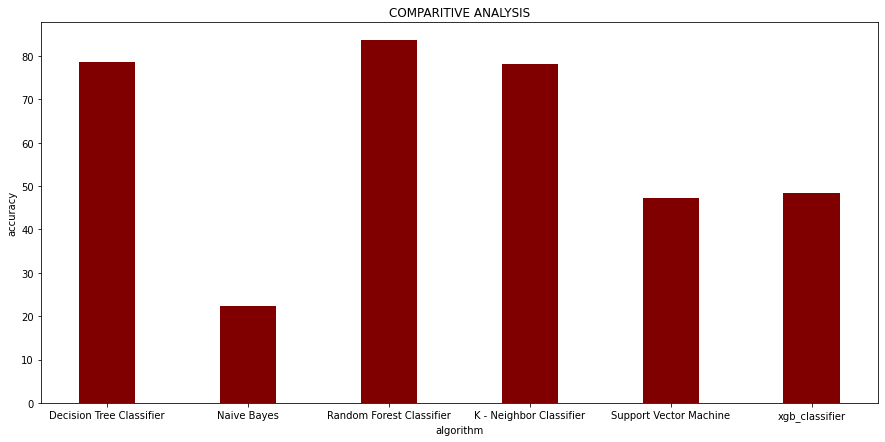

In [113]:
import numpy as np
import matplotlib.pyplot as plt

data = {'Decision Tree Classifier':78.53,'Naive Bayes':22.30,'Random Forest Classifier':83.59,'K - Neighbor Classifier':78.11,'Support Vector Machine':47.31,'xgb_classifier':48.46}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (15, 7))
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("algorithm")
plt.ylabel("accuracy")
plt.title("COMPARITIVE ANALYSIS")
plt.show()